### <span style='color:#006fb9'>DATA SCIENCE ENGINEERING METHODS FINAL PROJECT 
</span>

<span style='color:#006fb9'>
    <b>MEMBERS:</b>
    
Anusha Dheerendra Kulkarni - 002832115

Panchami Baleri - 002820639
    
</span>

<span style='color:#006fb9'>
    <b>Why water quality dataset?</b>
    
- Access to safe and readily available water is crucial for public health.
- Improved water supply, sanitation, and effective water resource management contribute to economic growth and poverty reduction
- Contaminated water and poor sanitation are linked to the transmission of diseases like cholera, diarrhea, dysentery, hepatitis A, typhoid, and polio.
- Inadequate water and sanitation services expose individuals to preventable health risks, particularly in healthcare facilities.
- Motivated by these considerations, we aim to utilize a Water Quality dataset to delve into what defines safe and potable water
- Employing machine learning techniques, we aspire to differentiate between Potable and Non-Potable water, contributing to the understanding and identification of water quality characteristics that ensure its safety for various purposes.
    </span>

### <span style='color:#006fb9'> Import necessary libraries</span>

In [1]:
# Basic library

import pandas as pd
import numpy as np
import time

# Visualizations Libraries

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
import plotly.express as px
from collections import Counter
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.tree import plot_tree

# Data Pre-processing Libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

# Evaluation & CV Libraries

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Load the dataset

df=pd.read_csv("water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### <span style='color:#006fb9'> Exploratory Data Analysis on the dataset</span>

In [4]:
# Shape of dataframe

df.shape

(3276, 10)

<span style='color:#006fb9'> We observe that there are 3276 rows and 10 columns in the dataframe </span>

In [5]:
# Print name of all the columns and type of each column (numerical or categorical)

for column in df.columns:
    data_type = df[column].dtype
    print(f"Column Name: {column}, Data Type: {data_type}")

Column Name: ph, Data Type: float64
Column Name: Hardness, Data Type: float64
Column Name: Solids, Data Type: float64
Column Name: Chloramines, Data Type: float64
Column Name: Sulfate, Data Type: float64
Column Name: Conductivity, Data Type: float64
Column Name: Organic_carbon, Data Type: float64
Column Name: Trihalomethanes, Data Type: float64
Column Name: Turbidity, Data Type: float64
Column Name: Potability, Data Type: int64


<span style='color:#006fb9'> We observe that all columns are of numerical value </span>

In [6]:
# Printing first 10 rows

df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [7]:
# Information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<span style='color:#006fb9'> 
Observations:
    
- There are total 3276 rows and 10 columns
- All columns are of numerical type
- The features ph, sulfate, trihalomethanes have null values
</span>

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<span style='color:#006fb9'>
    
<b>Observations:</b>

- We observe disparities in the scales of various features. Specifically, pH, Chloramines, Organic Carbon, and Turbidity share similar ranges, while Hardness and Sulfate fall within comparable scales. On the other hand, Conductivity exhibits a relatively larger range, and Solids stand out with exceptionally high values. To standardize these scales, the application of a standard scaler is necessary to bring all features to a uniform scale.

- Examining the statistical characteristics of certain features, such as pH, Hardness, Chloramines, Organic Carbon, Trihalomethanes, and Turbidity, reveals that their means are roughly equal to their medians. This observation suggests a symmetric skewed distribution with less significant standard deviation for these features.

- Contrastingly, for Solids and Conductivity, the mean exceeds the median, indicating a right-skewed distribution. In such distributions, the right tail is elongated, and outliers are more prevalent on the right side. The presence of outliers on the right significantly influences the mean, pulling it in that direction. Consequently, the standard deviation, which gauges data dispersion around the mean, is inflated due to the impact of outliers in the right tail. This results in a broad range of values, as evidenced by the diverse and spread-out values in the Solids feature, discernible in histograms or box plots.
</span>

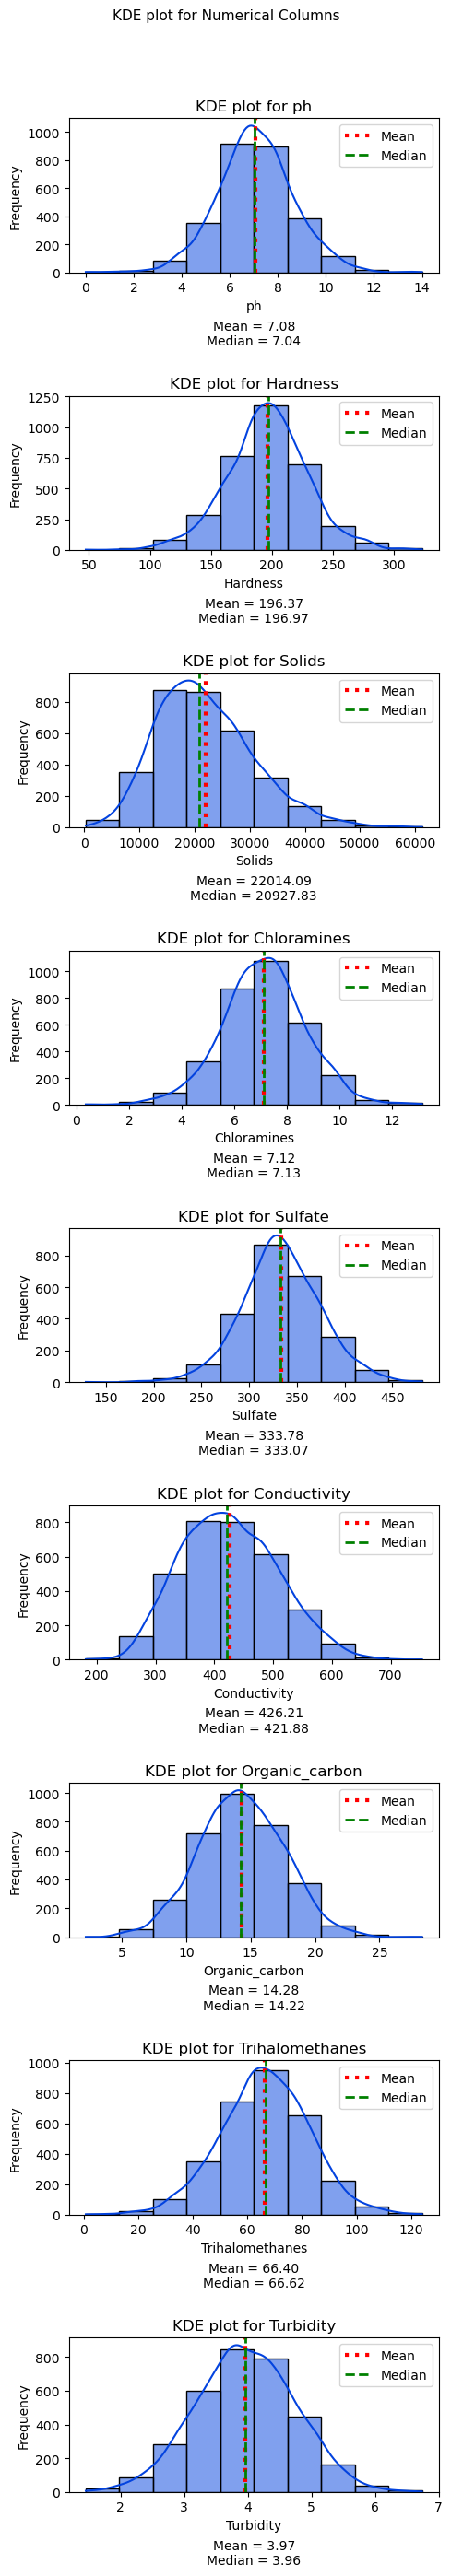

In [9]:
# KDE plot for all columns except the target column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(['Potability'], axis=1)

# Set the number of rows and columns for subplots
num_rows = len(numerical_columns.columns)
num_cols = 1

# Specify cobalt blue color
color = sns.xkcd_rgb['blue']

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 3 * num_rows))
fig.suptitle('KDE plot for Numerical Columns', y=1.02, fontsize=11)

# Flatten the axes since there is more than one row
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns.columns):
    
    sns.histplot(data=df, x=column, kde=True, color=color, bins=10, ax=axes[i])
    axes[i].axvline(df[column].mean(), color="red", linestyle="dotted", linewidth=3, label='Mean')
    axes[i].axvline(df[column].median(), color="green", linestyle="dashed", linewidth=2, label='Median')
    axes[i].set_title(f'KDE plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
for i, column in enumerate(numerical_columns.columns):
    text_str = f'\n\n\nMean = {df[column].mean():.2f}\nMedian = {df[column].median():.2f}'
    axes[i].text(0.5, -0.25, text_str, ha='center', va='center', transform=axes[i].transAxes)

plt.subplots_adjust(hspace=0.8)

plt.show()


<span style='color:#006fb9'>
    
<b>KDE plot Observations:</b>
- The parameters, including pH, Hardness, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, and Turbidity, show a symmetric shape in their graphs, with the mean and median values closely aligned.

- In contrast, Solids and Conductivity demonstrate a right-skewed distribution in the plot, indicating the presence of outliers at the higher end of the scale. This skewness implies that the mean exceeds the median, indicating that a majority of data points lie below the mean. The influence of outliers on the right side is significant, impacting both the mean and the overall distribution shape. This underscores the substantial effect of extreme values in this direction on the statistical properties of the dataset.
</span>

In [10]:
# Duplicates
duplicate = df.duplicated()
print(duplicate.sum())

0


<span style='color:#006fb9'> There are no duplicate values in the dataset </span>

In [11]:
# Check for the presence of outliers

total_outliers_in_dataset=0
for column in numerical_columns.columns:
    q1 = numerical_columns[column].quantile(0.25)
    q3 = numerical_columns[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = numerical_columns[(numerical_columns[column] < lower_bound) | (numerical_columns[column] > upper_bound)]

    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers[column])
        print("\n")
        print(f'The number of outliers in {column} is: ',outliers.shape[0])
        total_outliers_in_dataset+=outliers.shape[0]
        print("\n")
        
print(f'The total outliers in dataset is: {total_outliers_in_dataset}')

Outliers in ph:
9       11.180284
80       1.844538
104      2.612036
128     11.180695
204     11.267828
263     13.175402
317     11.301794
354      2.798549
692      1.757037
726      0.227499
783     11.898078
810      0.989912
1023    11.027880
1162    11.244507
1231     2.690831
1303    12.246928
1343     2.569244
1353    11.534880
2075    14.000000
2096    11.568768
2165     2.803563
2189     2.558103
2263    11.235426
2300     2.974429
2343     2.538116
2473     2.945469
2478    11.069456
2586    11.219135
2646    11.907740
2681     2.376768
2868    13.541240
2895    13.349889
2899     1.431782
2925    11.563169
2928     0.975578
2932     2.925174
2945    11.496702
2993     3.102076
3014     0.000000
3017    11.496859
3020    11.621140
3078    11.390543
3088     2.128531
3094     1.985383
3108    11.449739
3269    11.491011
Name: ph, dtype: float64


The number of outliers in ph is:  46


Outliers in Hardness:
18      279.357167
37      304.235912
51      100.457615
67      103

<span style='color:#006fb9'>
<b>Observations for Outliers:</b>

We note the presence of 366 outliers in our dataset. The decision to address these outliers is crucial, as their removal might lead to the loss of valuable information. Consequently, we opt to replace them with the median to maintain the integrity of our dataset. To gain further insights into the outliers, we can visualize their distribution by creating a box plot.
    </span>

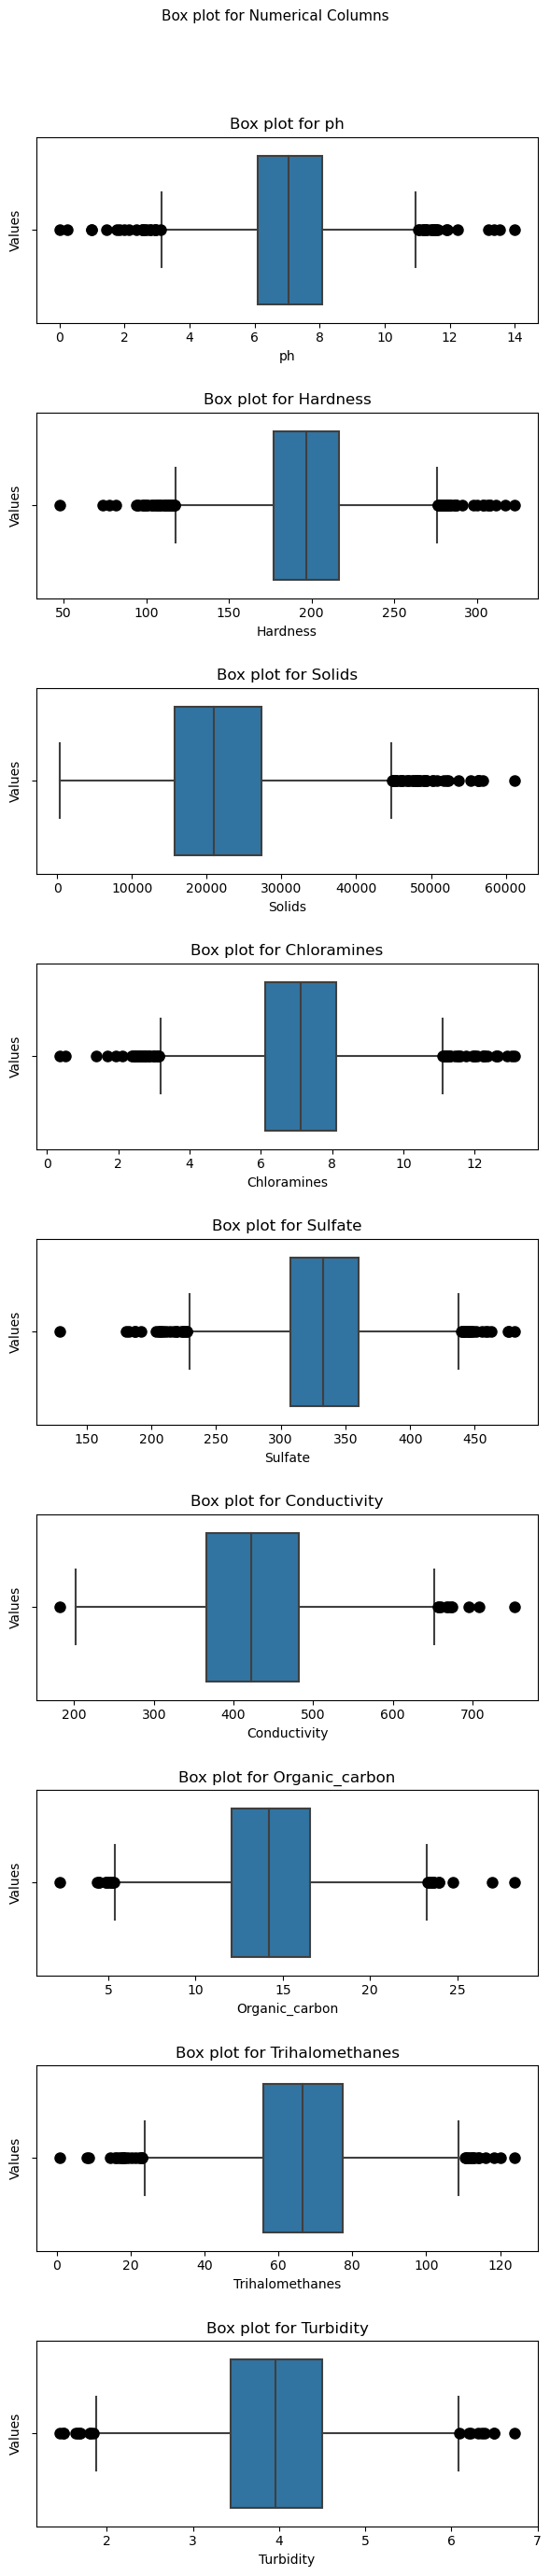

In [12]:
# Box plot

# Set the number of rows and columns for subplots
num_rows = len(numerical_columns.columns)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3 * num_rows))
fig.suptitle('Box plot for Numerical Columns', y=1.02, fontsize=11)

# Flatten the axes since there is more than one row
axes = axes.flatten()

# Plot box plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(data=numerical_columns, x=column, ax=axes[i],flierprops=dict(marker='o', markersize=8, markerfacecolor='black', markeredgecolor='black'))
    axes[i].set_title(f'\nBox plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values') 

# Adjust layout
plt.tight_layout()
plt.show()

<span style='color:#006fb9'>

<b>Box plot Observations:</b>

- In the case of ph, Hardness, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, and Turbidity, the box plot reveals outliers on both ends of the distribution. This suggests not only skewness but also variability and extreme values in both directions. The presence of outliers on both sides indicates a symmetrical skewness in the distribution. Such a distribution can significantly impact summary statistics like the mean, making it less representative of the central tendency. In such cases, relying on measures like the median and other robust statistics may offer a more reliable representation of the distribution's center.
    
- As anticipated, Solids and Conductivity exhibit outliers on the right side, aligning with the expectation that the mean is greater than the median. This implies that a majority of data points fall below the mean, and the outliers on the right side exert an upward pull on the mean, influencing its value. </span>

In [13]:
# Correlation between features

correlation=df.drop('Potability',axis=1).corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


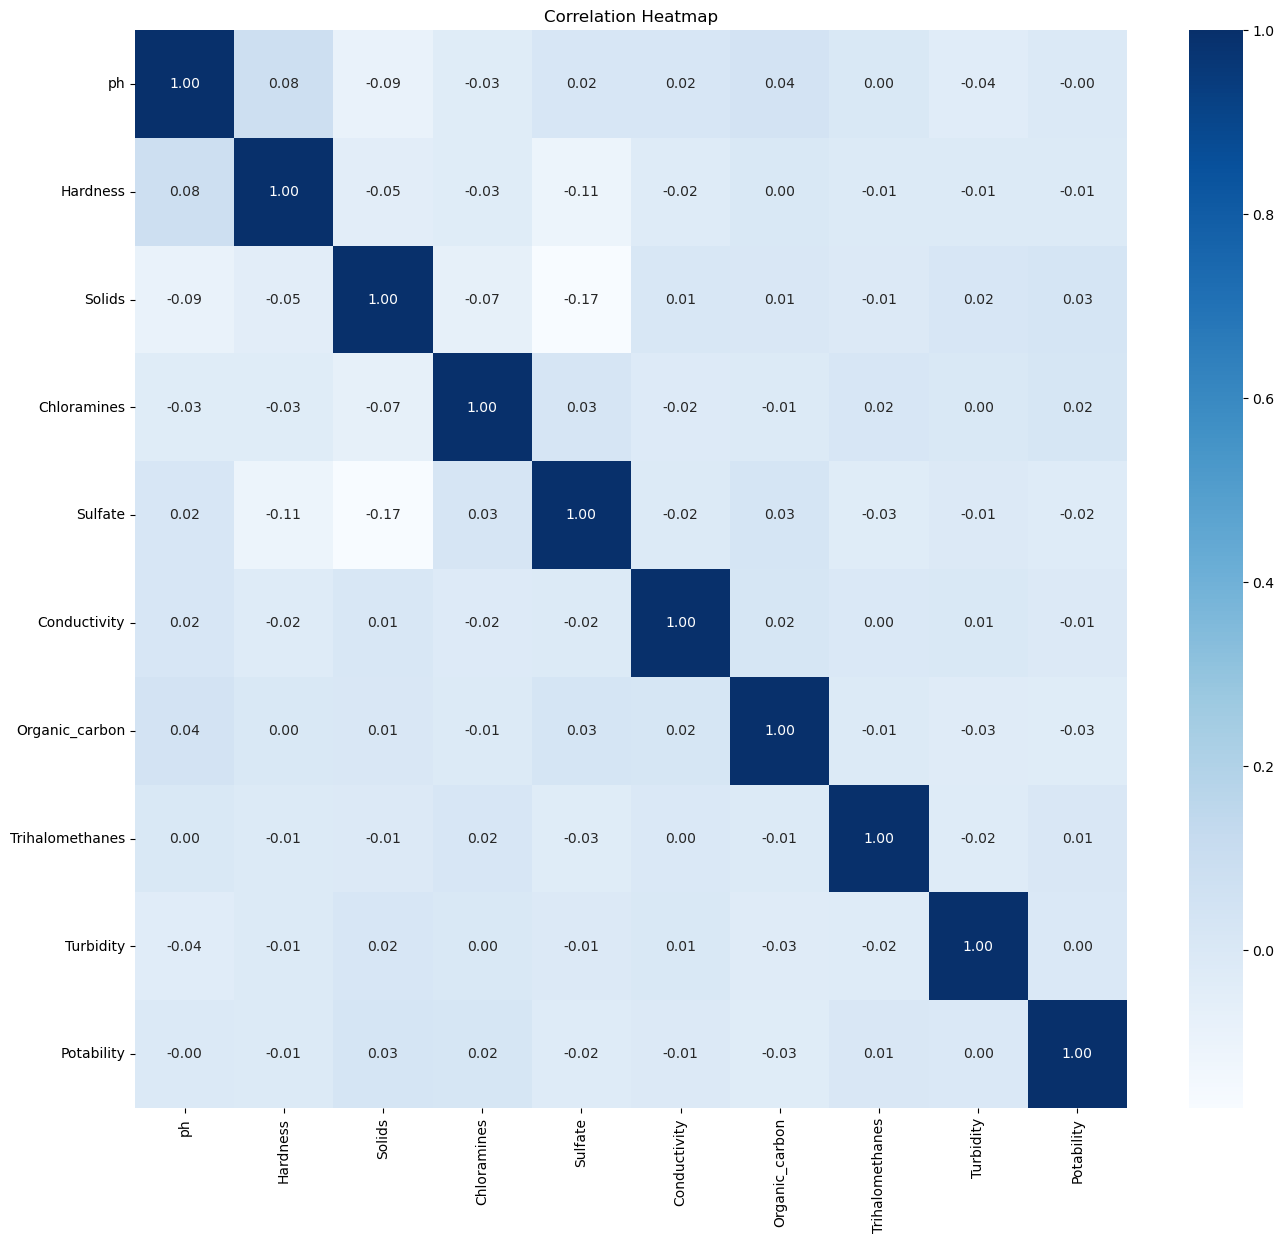

In [14]:
# Plot heatmap to observe the correlation between features

plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<span style='color:#006fb9'>

<b>Observations:</b>

- ph is positively correlated with Solids, Conductivity, Organic Carbon, Trihalomethanes and negatively correlated with Hardness, Chloramines, Sulfate, and Turbidity.
- Hardness is positively correlated with pH and negatively correlated with Solids, Chloramines, Sulfate, Conductivity, and Turbidity.
- Solids is negatively correlated with pH, Chloramines, Turbidity and positively correlated with Hardness, Sulfate, and Organic Carbon.
- Chloramines is negatively correlated with pH, Hardness, Solids and positively correlated with Trihalomethanes.
- Sulfate is positively correlated with pH, Conductivity, Organic Carbon and negatively correlated with Hardness and Turbidity.
- Conductivity is positively correlated with pH, Solids, Organic Carbon and negatively correlated with Hardness.
- Organic Carbon is positively correlated with pH, Solids, Conductivity and negatively correlated with Turbidity.
- Trihalomethanes is positively correlated with Chloramines and negatively correlated with Turbidity.
- Turbidity is negatively correlated with pH, Solids, Conductivity, Organic Carbon, Trihalomethanes and positively correlated with Hardness, Chloramines, and Sulfate.</span>

In [15]:
# Correlation with the target feature (Potability)
correlation_with_target = df.corr()['Potability'].sort_values(ascending=False)

print("Correlation with Potability:")
print(correlation_with_target)

Correlation with Potability:
Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64


<span style='color:#006fb9'>
    
<b>Observations:</b>

- Regarding Potability, Solids, Chloramines, Trihalomethanes, and Turbidity, there is a positive correlation, but the strength of this correlation is nearly zero, suggesting a minimal linear relationship.

- For pH, Conductivity, Hardness, Sulfate, and Organic Carbon, the correlation is negative. This implies that these features are in an inverse relationship with Potability, indicating that lower values of these features correspond to higher Potability. </span>

### <span style='color:#006fb9'> Preprocessing the dataset</span>

In [16]:
# Check for null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<span style='color:#006fb9'>

We observe that there are:

- 491 null values in pH
- 781 null values in Sulfate
- 162 null values in Trihalomethanes </span>

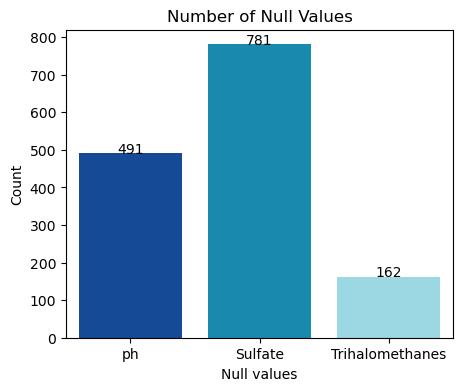

In [17]:
# Plotting Null Value Counts

null_counts = df.isna().sum()[df.isna().sum()>0].to_frame(name="null_count").reset_index().rename(columns={"index":"feature"})
colors = ["#0047ab", "#0096c7", "#90e0ef"]
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=null_counts['feature'], y=null_counts['null_count'], palette=colors)
plt.title('Number of Null Values')
plt.xlabel(f'Null values')
plt.ylabel('Count')
for i, v in enumerate(null_counts['null_count']):
    ax.text(i, v + 0.2, str(v), ha='center')

In [18]:
# Replace null values with median of the column

for col in df.columns:
    if df[col].isnull().any():
        df[col]=df[col].fillna(df[col].median())

In [19]:
# Check for null values again after replacing
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
# Define a function to remove outliers using the IQR method and replace with median

def remove_outliers_replace_with_median(dataframe, columns):
    for column in columns:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)

        # Replace outliers with the median value
        median_value = dataframe[column].median()
        dataframe.loc[outliers, column] = median_value

    return dataframe

# Specify the columns you want to process
columns_to_process = df.columns

# Apply the modified function to remove outliers and replace with median
df_cleaned = remove_outliers_replace_with_median(dataframe=df, columns=columns_to_process)

# Display the shape of the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (3276, 10)
Cleaned DataFrame shape: (3276, 10)


In [21]:
# Store the values of Potability feature in a variable named ‘target’ and then drop the feature from the dataframe

# Store the 'Potability' feature in the 'target' variable
target = df_cleaned['Potability']

# Drop the 'Potability' feature from the DataFrame
df_cleaned = df_cleaned.drop(columns=['Potability'])

# Verify the shape of the DataFrame
print("Shape of df after dropping 'Potability':", df_cleaned.shape)

#for feature selection store dataframe in another variable
df_feature = df_cleaned

Shape of df after dropping 'Potability': (3276, 9)


Potability 0 : Count 1998
Potability 1 : Count 1278


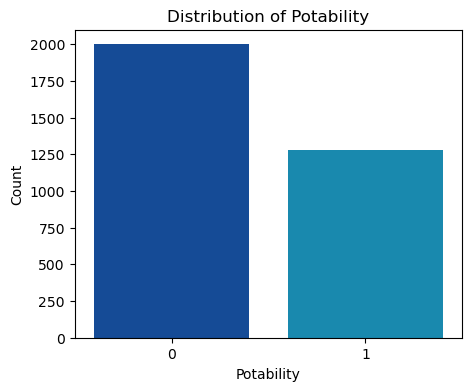

In [22]:
# Target variable Potability count

potability_counts = target.value_counts()

# Extracting values and their counts
values = potability_counts.index
counts = potability_counts.values
colors = ["#0047ab", "#0096c7"]
# Plotting the counts using a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=values, y=counts, palette=colors)
plt.title('Distribution of Potability')
plt.xlabel(f'Potability')
plt.ylabel('Count')
for value, count in zip(values, counts):
    print(f'Potability {int(value)} : Count {count}')
plt.show()

<span style='color:#006fb9'> 

To address the imbalance in counts, we aim to balance the dataset by employing oversampling technique. </span>

In [23]:
# Standardizing the data

standardizer = StandardScaler()
df_standardized = pd.DataFrame(standardizer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Display the standardized DataFrame for the cleaned data
df_standardized

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.022444,0.284762,-0.101129,0.122475,1.373795,1.747568,-1.223264,1.404154,-1.322322
1,-0.022444,-2.282403,-0.366750,-0.337558,-0.014574,2.107306,0.280163,-0.694912,0.702600
2,0.853856,0.942844,-0.209500,1.489274,-0.014574,-0.086606,0.809039,-0.004096,-1.200106
3,1.033378,0.607341,0.049683,0.647646,0.918213,-0.783249,1.300100,2.318123,0.871327
4,1.673016,-0.524462,-0.446768,-0.398885,-0.913094,-0.340836,-0.854160,-2.360580,0.142108
...,...,...,...,...,...,...,...,...,...
3271,-1.976231,-0.096523,-0.084351,0.030067,1.038175,1.270660,-0.122484,0.014223,0.617212
3272,0.614427,-0.100895,-0.526553,0.649050,-0.014574,-0.415879,1.759469,0.009759,-1.539486
3273,1.942979,-0.706073,1.418453,0.157080,-0.014574,0.082565,-1.016776,0.230395,-0.880150
3274,-1.597903,1.159446,-1.183575,-0.567164,-0.014574,-0.284536,-0.976099,0.753610,0.976540


<span style='color:#006fb9'> The data standardization process is being implemented to ensure uniformity in the range of all features. As observed earlier, certain features exhibited exceptionally high ranges, while others had lower ranges.</span>

0       0
1       0
2       0
3       0
4       0
       ..
1949    1
801     1
3239    1
3123    1
1553    1
Name: Potability, Length: 3996, dtype: int64
(3996, 9)
Potability 0 : Count 1998
Potability 1 : Count 1998


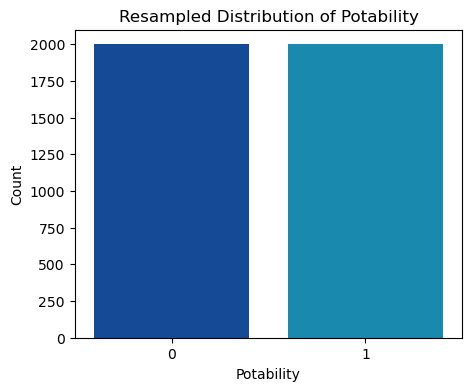

In [24]:
#Oversampling the data to get same count for target classes

X = df_standardized
y = target

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

#Oversampling the minority class
X_majority = df[df['Potability'] == 0]
X_minority = df[df['Potability'] == 1]
no_of_samples_in_each_class=int((len(X_majority)+len(X_minority))/2)

# Resample the minority class to match the number of samples in the majority class
X_resampled_minority = resample(X_minority, replace=True, n_samples=len(X_majority), random_state=42)


# Combine the resampled minority class with the majority class
X_resampled = pd.concat([X_majority, X_resampled_minority])

# Separate features and target variable
y_resampled = X_resampled['Potability']
print(y_resampled)
X_resampled = X_resampled.drop('Potability', axis=1)
print(X_resampled.shape)

# Display the resampled distribution
resampled_counts = y_resampled.value_counts()
resampled_values = resampled_counts.index
resampled_counts_values = resampled_counts.values

plt.figure(figsize=(5, 4))
sns.barplot(x=resampled_values, y=resampled_counts_values, palette=colors)
plt.title('Resampled Distribution of Potability')
plt.xlabel(f'Potability')
plt.ylabel('Count')
for value, count in zip(resampled_values, resampled_counts_values):
    print(f'Potability {int(value)} : Count {count}')
plt.show()

<span style='color:#006fb9'> To achieve an equal distribution of the target classes (potability of water), oversampling has been applied. This step is crucial as it prevents imbalanced datasets from being skewed towards the majority class, which could result in the model predominantly predicting the majority class. By oversampling the minority class, we balance the class distribution, enabling the model to learn patterns associated with both classes more effectively.</span>

### <span style='color:#006fb9'> Train and test the dataset </span>

In [25]:
#splitting the dataset into training data and testing data
X = X_resampled
y = y_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### <span style='color:#006fb9'> Gaussian Naive Bayes Model </span>

<span style='color:#006fb9'>
    
The Gaussian Naive Bayes algorithm is a probabilistic machine learning technique commonly applied to various classification tasks, including document classification, spam filtering, and prediction. It assumes that the features follow a Gaussian distribution.

The term "Naïve" is used because the algorithm makes the naive assumption that the presence of a specific feature in a class is independent of the presence of any other features. This implies that the features are conditionally independent given the class label. The algorithm operates on the assumption that once the class label is known, the presence or value of one feature does not depend on the presence or value of any other feature.

This assumption of feature independence simplifies the computation and enhances the efficiency of the algorithm. By assuming independence, the joint probability of features given the class can be computed as the product of individual feature probabilities. This simplification is particularly advantageous in dealing with high-dimensional feature spaces.

The workflow of the Gaussian Naive Bayes algorithm involves calculating the prior probability for each class label, computing the conditional probability for each attribute within each class, and then multiplying the prior probability with the conditional probability. The algorithm compares the probabilities for each class and classifies the input accordingly
    
Manual steps to check water potability:
    
- calculate the priori probability for given class labels i.e 0 and 1 for water potability 

P(Potability=0)]

P(Potability=1)]

- calculate conditional probability with each attributes for each class.

[P(ph|0)P(Hardness|0)P(Solids|0)P(Chloramines|0)P(sulfate|0)P(conductivity|0)P(organic_carbon|0)P(Trihalomethanes|0)P(Turbity|0)]
    
    
[P(ph|1)P(Hardness|1)P(Solids|1)P(Chloramines|1)P(sulfate|1)P(conductivity|1)P(organic_carbon|1)P(Trihalomethanes|1)P(Turbity|1)]


- Multiply prior probability with conditional probability

P(0|x'):[P(ph|0)P(Hardness|0)P(Solids|0)P(Chloramines|0)P(sulfate|0)P(conductivity|0)p(organic_carbon|0)p(Trihalomethanes|0)p(Turbity|0)][P(Potability=0)]

P(1|x'):
[P(ph|1)P(Hardness|1)P(Solids|1)P(Chloramines|1)P(sulfate|1)P(conductivity|1)p(organic_carbon|1)p(Trihalomethanes|1)p(Turbity|1)][P(Potability=1)]

- See which class has higher probability.

- If P(0|x') > P(1|x') then water is not potable
- If P(1|x') > P(0|x') then water is potable

 </span>

In [26]:
# Train the model using Gaussian Naive Bayes Model

accuracy_results={}
model=GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Gaussian Naive Bayes accuracy: {accuracy_score(y_test, y_pred)}")
print(f"\nConfusion Matrix for Gaussian Naive Bayes:\n", confusion_matrix(y_test, y_pred))
print(f"\nClassification Report for Gaussian Naive Bayes:\n", classification_report(y_test, y_pred))

accuracy_score_gnb=accuracy_score(y_test, y_pred)


accuracy_results['Gaussian Naive Bayes']=accuracy_score_gnb

Gaussian Naive Bayes accuracy: 0.53

Confusion Matrix for Gaussian Naive Bayes:
 [[216 204]
 [172 208]]

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53       420
           1       0.50      0.55      0.53       380

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



<span style='color:#006fb9'>

<b>Observations:</b>

<b>Accuracy:</b>
    
The accuracy of the Gaussian Naive Bayes model is 53%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 216 - The number of correctly predicted positive samples.
- False Positive (FP): 204 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 172 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 208 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.56 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.50 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.51 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.55 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.53 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.53 - The harmonic mean of precision and recall for potable class.

</span>

### <span style='color:#006fb9'> Gaussian Naive Bayes Model after selecting 6 best features</span>

In [27]:
# Select top 6 features

# Creating the SelectKBest object using the f_classif scoring function
k_best_selector = SelectKBest(score_func=f_classif, k=6)

# Fitting and transforming the training features
X_train_k_best = k_best_selector.fit_transform(X_train, y_train)

# Transforming the testing features
X_test_k_best = k_best_selector.transform(X_test)

# Get the selected feature indices
selected_feature_indices = k_best_selector.get_support(indices=True)

# Get the names of the top 6 features
selected_features = X_train.columns[selected_feature_indices]

# Display the names of the top 6 features
print("Top 6 selected features:")
print(selected_features)

Top 6 selected features:
Index(['Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Trihalomethanes', 'Turbidity'],
      dtype='object')


In [28]:
# Filter the DataFrame to keep only the selected features and the target variable
df_filtered = X_resampled[selected_features]

# Separate the features and target variable
X_fs = df_filtered
y_fs = y_resampled

# Split the data into training and testing sets
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=100)

In [29]:
# Train the model using Gaussian Naive Bayes Model

model=GaussianNB()

model.fit(X_train_fs, y_train_fs)

y_pred_fs = model.predict(X_test_fs)

print(f"Gaussian Naive Bayes accuracy after feature selection: {accuracy_score(y_test_fs, y_pred_fs)}")
print(f"\nConfusion Matrix for Gaussian Naive Bayes:\n", confusion_matrix(y_test_fs, y_pred_fs))
print(f"\nClassification Report for Gaussian Naive Bayes:\n", classification_report(y_test_fs, y_pred_fs))

Gaussian Naive Bayes accuracy after feature selection: 0.5475

Confusion Matrix for Gaussian Naive Bayes:
 [[212 208]
 [154 226]]

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54       420
           1       0.52      0.59      0.56       380

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.55      0.55      0.55       800



<span style='color:#006fb9'>

<b>Observations after selecting 6 best features:</b>

<b>Accuracy:</b>
    
The accuracy of the Gaussian Naive Bayes model is 54.75%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 212 - The number of correctly predicted positive samples.
- False Positive (FP): 208 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 154 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 226 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.58 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.52 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.50 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.50 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.54 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.56 - The harmonic mean of precision and recall for potable class.

</span>

### <span style='color:#006fb9'> K-Nearest Neighbors </span>

<span style='color:#006fb9'>
The K-Nearest Neighbors (KNN) algorithm operates by measuring the distance between a test point and training points. It arranges these distances in ascending order and selects a specified number of closest neighbors, often denoted by "k." In this description, it considers four closest neighbors, starting from the minimum distance.

Once the nearest neighbors are identified, the algorithm predicts the target class of the test point by determining the majority target class among these neighbors. In the context of water potability prediction, it assesses whether the water is potable or not based on the water potability status of the four closest neighbors. This decision is made by selecting the most frequently occurring target class among the neighbors. </span>

In [30]:
#Training the model using K-Nearest Neighbors

model = KNeighborsClassifier(n_neighbors=6,weights='distance')   
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
print(f"K-nearest Neighbors accuracy : {accuracy_score(y_test,y_pred)}")
print("\nConfusion Matrix knn :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report knn :\n",classification_report(y_test, y_pred))

accuracy_score_knn=accuracy_score(y_test, y_pred)
accuracy_results['K-nearest Neighbors']=accuracy_score_knn

K-nearest Neighbors accuracy : 0.74

Confusion Matrix knn :
 [[262 158]
 [ 50 330]]

Classification Report knn :
               precision    recall  f1-score   support

           0       0.84      0.62      0.72       420
           1       0.68      0.87      0.76       380

    accuracy                           0.74       800
   macro avg       0.76      0.75      0.74       800
weighted avg       0.76      0.74      0.74       800



<span style='color:#006fb9'>

<b>Observations:</b>

<b>Accuracy:</b>
    
The accuracy of the K-nearest Neighbors accuracy is 74%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 262 - The number of correctly predicted positive samples.
- False Positive (FP): 158 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 50 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 330 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.84 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.68 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.62 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.87 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.72 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.76 - The harmonic mean of precision and recall for potable class.

</span>

### <span style='color:#006fb9'> K-Nearest Neighbors after selecting 6 best features</span>

In [31]:
#Training the model using K-Nearest Neighbors after feature selection

model = KNeighborsClassifier(n_neighbors=6,weights='distance')   
model.fit(X_train_fs, y_train_fs)  
y_pred_fs = model.predict(X_test_fs)
print(f"K-nearest Neighbors accuracy after feature selection: {accuracy_score(y_test_fs,y_pred_fs)}")
print("\nConfusion Matrix knn :\n", confusion_matrix(y_test_fs, y_pred_fs))
print("\nClassification Report knn :\n",classification_report(y_test_fs, y_pred_fs))

K-nearest Neighbors accuracy after feature selection: 0.70125

Confusion Matrix knn :
 [[234 186]
 [ 53 327]]

Classification Report knn :
               precision    recall  f1-score   support

           0       0.82      0.56      0.66       420
           1       0.64      0.86      0.73       380

    accuracy                           0.70       800
   macro avg       0.73      0.71      0.70       800
weighted avg       0.73      0.70      0.70       800



<span style='color:#006fb9'>

<b>Observations after selecting 6 best features:</b>

<b>Accuracy:</b>
    
The accuracy of the K-nearest Neighbors accuracy is 70.125%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 234 - The number of correctly predicted positive samples.
- False Positive (FP): 186 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 53 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 327 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.82 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.64 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.56 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.86 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.66 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.73 - The harmonic mean of precision and recall for potable class.

</span>

### <span style='color:#006fb9'>Random Forest</span>

<span style='color:#006fb9'>
The Random Forest algorithm is a versatile and user-friendly machine learning method that often delivers excellent results even without hyperparameter tuning. It is widely utilized due to its simplicity and applicability to both classification and regression tasks.

Operating as a supervised learning algorithm, Random Forest constructs an ensemble of decision trees, typically trained using the "bagging" method. The bagging method involves combining multiple learning models to enhance overall performance.

In essence, Random Forest builds numerous decision trees and merges their outputs to achieve a more accurate and stable prediction. The algorithm works by constructing a variable number of decision tree classifiers or regressors. The final output is determined by aggregating the outputs of all decision trees, leveraging the concept of the wisdom of crowds. This characteristic makes Random Forests powerful tools in machine learning.

A Random Forest classifier is essentially a collection of decision tree classifiers, each striving to provide the best output. The final prediction from the Random Forest classifier is the mode of the classes, meaning the class that appears most frequently in the list of outputs from all the decision trees used.

When building a Random Forest with T trees, a dataset of M rows, and N features, each decision tree undergoes the following process:

- Select a random subset of features from the entire set.
- Select a random subset of rows from the entire dataset.
- Build the current tree using the chosen features and rows subsets.
    
The Random Forest combines hundreds or thousands of decision trees, training each one on a slightly different set of observations and splitting nodes with consideration for a limited number of features. The final predictions are made by averaging the predictions of each individual tree, contributing to the robustness and accuracy of the overall model. </span>

In [32]:
#Training the model using Random Forest

# Set a seed for reproducibility
random_seed = 42
model=RandomForestClassifier(n_estimators=300,max_depth=20, random_state=random_seed)
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
print(f"Random Forest accuracy : {accuracy_score(y_test,y_pred)}")
print("\nConfusion Matrix for Random Forest :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report for Random Forest :\n",classification_report(y_test, y_pred))


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Random Forest accuracy : 0.83

Confusion Matrix for Random Forest :
 [[350  70]
 [ 66 314]]

Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       420
           1       0.82      0.83      0.82       380

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



0.8298245614035089

<span style='color:#006fb9'>

<b>Observations:</b>

<b>Accuracy:</b>
    
The accuracy of the Random Forest model is 83%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 350 - The number of correctly predicted positive samples.
- False Positive (FP): 70 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 66 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 314 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.84 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.82 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.83 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.83 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.84 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.82 - The harmonic mean of precision and recall for potable class.

</span>

In [33]:
# Feature Importance

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
ph,0.123612
Hardness,0.123580
Solids,0.117220
Chloramines,0.116643
Organic_carbon,0.107566
Conductivity,0.107417
Turbidity,0.103343
Sulfate,0.101895
Trihalomethanes,0.098724


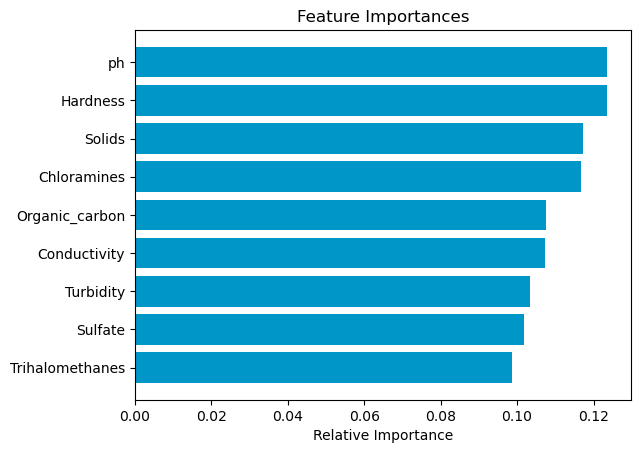

In [34]:
# Plot the Feature Importance

features = X.columns.values
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#0096c7', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### <span style='color:#006fb9'>Random Forest after selecting 6 best features</span>

In [35]:
#Training the model using Random Forest

# Set a seed for reproducibility
random_seed = 42
model=RandomForestClassifier(n_estimators=300,max_depth=20, random_state=random_seed)
model.fit(X_train_fs, y_train_fs)  
y_pred_fs = model.predict(X_test_fs)
print(f"Random Forest accuracy after feature selection: {accuracy_score(y_test_fs,y_pred_fs)}")
print("\nConfusion Matrix for Random Forest :\n", confusion_matrix(y_test_fs, y_pred_fs))
print("\nClassification Report for Random Forest :\n",classification_report(y_test_fs, y_pred_fs))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_fs, y_pred_fs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Random Forest accuracy after feature selection: 0.80125

Confusion Matrix for Random Forest :
 [[336  84]
 [ 75 305]]

Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       420
           1       0.78      0.80      0.79       380

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



0.8013157894736843

<span style='color:#006fb9'>

<b>Observations after selecting 6 best features:</b>

<b>Accuracy:</b>
    
The accuracy of the Random Forest model is 80.125%, indicating the proportion of correctly classified samples out of the total.

<b>Confusion Matrix:</b>

- True Positive (TP): 336 - The number of correctly predicted positive samples.
- False Positive (FP): 84 - The number of negative samples incorrectly predicted as positive.
- False Negative (FN): 75 - The number of positive samples incorrectly predicted as negative.
- True Negative (TN): 305 - The number of correctly predicted negative samples.

<b>Precision:</b>

- Precision for class 0 (non-potable): 0.82 - The ratio of correctly predicted non-potable samples to the total predicted non-potable samples.
- Precision for class 1 (potable): 0.78 - The ratio of correctly predicted potable samples to the total predicted potable samples.
    
<b>Recall:</b>

- Recall for class 0 (non-potable): 0.80 - The ratio of correctly predicted non-potable samples to the total actual non-potable samples.
- Recall for class 1 (potable): 0.80 - The ratio of correctly predicted potable samples to the total actual potable samples.
    
<b>F1 Score:</b>

- F1 Score for class 0 (non-potable): 0.81 - The harmonic mean of precision and recall for non-potable class.
- F1 Score for class 1 (potable): 0.79 - The harmonic mean of precision and recall for potable class.

</span>

<span style='color:#006fb9'> We can see that almost all the features are almost equally important in order to get the best accuracy and we cannot select any few features as such</span>

### <span style='color:#006fb9'> Tuning the Parameters</span>

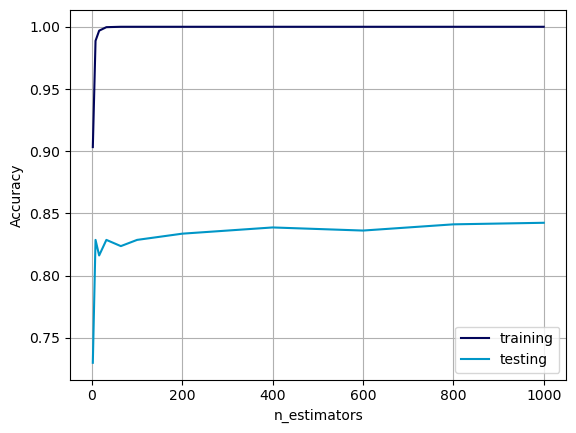

In [36]:
# Performing hyperparameter tuning using n_estimators

# Define a list of n_estimators values to be tested
n_estimators = [2,8,16,32,64,100,200,400,600,800,1000]

# Lists to store training and testing accuracy for each n_estimators
tr_accuracy = []
tst_accuracy = []

# Lists to store training and testing AUC-ROC values for each n_estimators
tr_auc = []
tst_auc = []

for est in n_estimators:
    rf = RandomForestClassifier(n_estimators= est, random_state=random_seed)
    rf.fit(X_train,y_train)
    
# Predictions on the training set
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
# Predictions on the testing set
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

# Plotting the accuracy results
line_1, = plt.plot(n_estimators, tr_accuracy, label='training',color='#02055a')
line_2, = plt.plot(n_estimators, tst_accuracy, label='testing',color='#0096c7')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.grid()

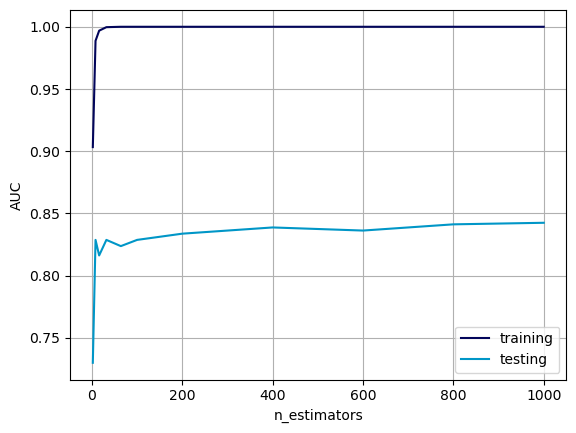

In [37]:
# Plotting the AUC results
line_1, = plt.plot(n_estimators, tr_accuracy, label='training',color='#02055a')
line_2, = plt.plot(n_estimators, tst_accuracy, label='testing',color='#0096c7')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('n_estimators')
plt.grid()

<span style='color:#006fb9'>
In our hyperparameter tuning process for the n_estimators parameter in a RandomForestClassifier, we systematically varied its values and evaluated the corresponding performance metrics. These metrics include training and testing accuracy, as well as the AUC-ROC (Area Under the Receiver Operating Characteristic) score.

Upon visualizing the results, it becomes evident that the training accuracy peaks when the number of estimators (n_estimators) is around 200-400. This indicates that the highest accuracy on the training data is achieved when the RandomForest comprises approximately 200-400 trees in the forest. The observed trend provides insights into the optimal range of n_estimators for maximizing accuracy on the training dataset. </span>

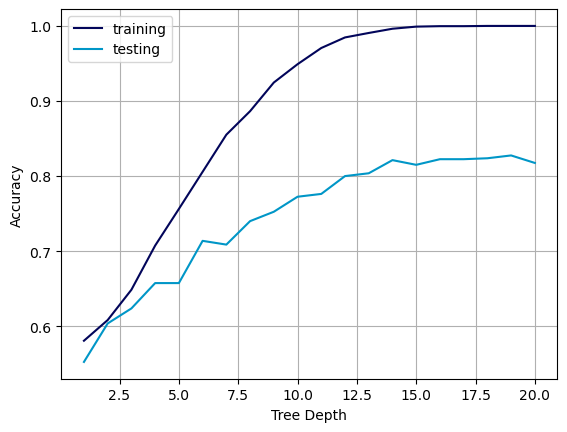

In [38]:
# Performing hyperparameter tuning using max_depth

# Define a range of max_depth values to be tested
max_depths = np.linspace(1,20,20, endpoint=True).astype(int)

# Lists to store training and testing accuracy for each max_depth
tr_accuracy = []
tst_accuracy = []

# Lists to store training and testing AUC-ROC values for each max_depth
tr_auc = []
tst_auc = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth = max_depth, random_state=random_seed)
    rf.fit(X_train,y_train)
    
# Predictions on the training set
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
# Predictions on the testing set    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

# Plotting the results
line_1, = plt.plot(max_depths, tr_accuracy, label='training',color='#02055a')
line_2, = plt.plot(max_depths, tst_accuracy, label='testing',color='#0096c7')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.grid()

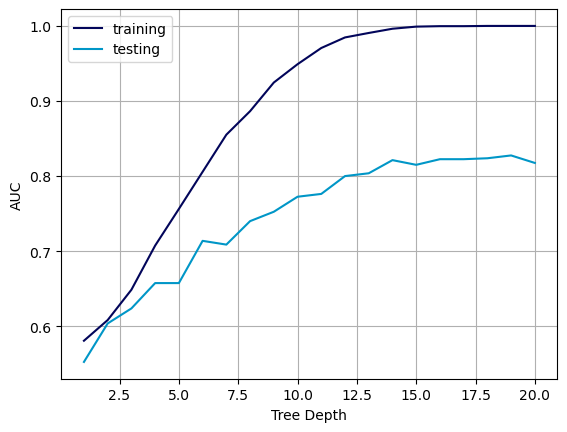

In [39]:
# Plotting the results
line_1, = plt.plot(max_depths, tr_accuracy, label='training',color='#02055a')
line_2, = plt.plot(max_depths, tst_accuracy, label='testing',color='#0096c7')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('Tree Depth')
plt.grid()

<span style='color:#006fb9'>
    
In our hyperparameter tuning process for the max_depth parameter in a RandomForestClassifier, we systematically adjusted its values and assessed various performance metrics, including training and testing accuracy, as well as the AUC-ROC (Area Under the Receiver Operating Characteristic) score.

Upon visualizing the outcomes, it becomes evident that the highest accuracy is achieved when the depth of the trees (max_depth) falls within the range of 15-18. This suggests that, for optimal performance, the depth of the trees in the forest should be set within this specific range. The observed trend provides guidance on selecting an appropriate value for the max_depth hyperparameter to maximize accuracy on both the training and testing datasets.</span>

In [40]:
# Performing hyperparameter tuning using GridSearchCV

# Define a grid of hyperparameter values to be tested
start = time.time()
n_estimators = [200,300,400]
max_depths = [15,18]
boot_strap = [True, False]
max_features = ['sqrt', 'log2', None]
criteria = ['gini', 'entropy']
parameters = {'max_depth': max_depths,
              'bootstrap': boot_strap,
              'max_features': max_features,
              'criterion': criteria,
              'n_estimators': n_estimators
             }

# Initialize RandomForestClassifier and GridSearchCV
rf = RandomForestClassifier(random_state=random_seed)

# rf.fit(X_train, y_train)
rf_model = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)

rf_model.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf = rf_model.best_estimator_

# Fit the best algorithm to the data.
rf.fit(X_train, y_train)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 400}
Time taken in grid search:  101.38


RandomForestClassifier(bootstrap=False, max_depth=18, n_estimators=400,
                       random_state=42)

In [41]:
# Make Predictions

y_pred = rf.predict(X_test)
print(f"Random Forest after Hyperparameter tuning accuracy : {accuracy_score(y_test,y_pred)}")

accuracy_score_random_forest=accuracy_score(y_test,y_pred)
accuracy_results['Random Forest']=accuracy_score_random_forest

Random Forest after Hyperparameter tuning accuracy : 0.84625


<span style='color:#006fb9'>Among all the models, the Random Forest exhibits the highest accuracy, reaching 84.62%.We tested our dataset using Gaussian Naive bayes, KNN and Random Forest.
 </span>

<span style='color:#006fb9'>
    
<b>Summary</b>
    
We tested our dataset using Gaussian Naive bayes, KNN and Random Forest.
Let's plot a bar graph to visualize the accuracy of 3 models.
 </span>

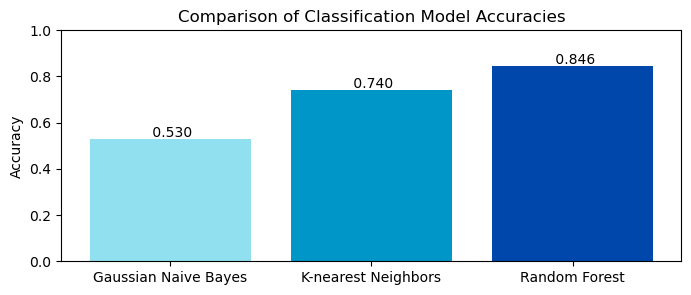

In [42]:
# Plotting the accuracy results

model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plotting the accuracy results using a different style

plt.figure(figsize=(8, 3))
plt.bar(model_names, accuracy_values, color=["#90e0ef", "#0096c7", "#0047ab"])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')
plt.show()

<span style='color:#006fb9'> We observe that Random Forest provides the highest accuracy among the three models. This suggests that based on the performance metric of accuracy, it is the most suitable model for the dataset. Higher accuracy generally indicates better overall predictive performance on the given data. </span>

<span style='color:#006fb9'>
<b>Future Improvement</b>

- Ensemble Methods:
Explore ensemble methods like bagging or boosting (e.g., AdaBoost, Gradient Boosting). Combining the predictions of multiple models can often result in improved performance.

- Cross-Validation:
Implement robust cross-validation techniques to ensure that the model's performance is consistent across different subsets of the data. This helps assess the model's generalization ability.

- Utilize External Data:
Explore the possibility of incorporating external datasets that may complement and enhance your current dataset.
</span>

<span style='color:#006fb9'>
    
<b>Reference</b>
 
- jaykumar1607. Water Quality Analysis: Plotly and Modelling. Kaggle. https://www.kaggle.com/code/jaykumar1607/water-quality-analysis-plotly-and-modelling
- Analytics Vidhya. (2022, March). Gaussian Naive Bayes Algorithm for Credit Risk Modelling. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/
- scikit-learn. scikit-learn: Machine Learning in Python. https://scikit-learn.org/stable/
- GeeksforGeeks. k-Nearest Neighbours (KNN). GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/
- Analytics Vidhya. (2021, June). Understanding Random Forest - A Machine Learning Algorithm. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
- Harvard Health Publishing. How Much Water Should You Drink? Harvard Health Blog. https://www.health.harvard.edu/staying-healthy/how-much-water-should-you-drink
- ISO Update. ISO 9004 - Quality Management. ISO Update. https://isoupdate.com/standards/iso-9004/
- Open University. Title of the module. OpenLearn. https://www.open.edu/openlearn/mod/oucontent/view.php?id=26084&section=3 </span>